<a href="https://colab.research.google.com/github/sweerasingha/breast_cancer_prediction/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Breast Cancer


---

# Group No: 65

EG/2020/4267 - Weerasingha W.A.S.S.

EG/2020/4086 - Naulla N.D.P.A.

# Import Libraries

In [6]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Remove the warnings
import warnings
warnings.filterwarnings('ignore')
# Access Secrets
from google.colab import userdata

kaggle_username = userdata.get('kaggle_username')
kaggle_key = userdata.get('kaggle_key')

# Download dataset from Kaggle

In [9]:
# Set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']= kaggle_username
os.environ['KAGGLE_KEY']= kaggle_key

In [10]:
# Download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 1.96MB/s]


In [11]:
# Unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [12]:
# Load data on dataframe
df = pd.read_csv('/content/data.csv')

In [13]:
# Display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
# Count of rows and columns
df.shape

(569, 33)

In [15]:
# Count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [17]:
# Count of rows and columns
df.shape

(569, 32)

In [18]:
# Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [19]:
# Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
# Encode the diagnosis values
labelencoder = LabelEncoder()
df.iloc[:,1] =labelencoder.fit_transform(df.iloc[:,1].values)

In [21]:
# Display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [22]:
# Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [23]:
# Splitting datasets into training(75%) and testing(25%)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [24]:
# Scaling the data(feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
# Print data
X_train

array([[ 0.40622394, -1.26066823,  0.37261034, ...,  0.33104654,
        -0.30701878, -0.72313241],
       [ 0.34353407,  0.10664102,  0.38915005, ...,  1.46630373,
         0.41923582,  0.97265574],
       [-0.40589484, -0.33931911, -0.40516949, ..., -0.55253917,
        -0.21936737, -0.26262181],
       ...,
       [-1.39041076,  0.49827099, -1.38059885, ..., -1.18414946,
        -0.0738034 , -0.05275511],
       [ 0.20105709,  1.29058596,  0.10549403, ..., -1.31652015,
        -2.11952488, -1.57510421],
       [-0.57971675, -0.35290166, -0.60860792, ..., -0.50922615,
         0.30341073, -0.14627084]])

# Build a Logistic Regression Model

In [26]:
# Build a logistic regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train,Y_train)

LogisticRegression()

In [27]:
# Make use of trained model to make predictions on test data
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

In [28]:
# Print the actual and predicted values for comparison
print("Actual Values:", Y_test)
print("Predicted Values (Logistic Regression):", logistic_regression_predictions)

Actual Values: [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0]
Predicted Values (Logistic Regression): [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0]


In [29]:
# Get accuracy score for model
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)

In [30]:
# Sensitivity (Recall) for Logistic Regression
logistic_regression_sensitivity = recall_score(Y_test, logistic_regression_predictions)

In [31]:
# Specificity calculation requires true negative and false positive counts
tn, fp, fn, tp = confusion_matrix(Y_test, logistic_regression_predictions).ravel()
logistic_regression_specificity = tn / (tn + fp)

In [32]:
# Precision for Logistic Regression
logistic_regression_precision = precision_score(Y_test, logistic_regression_predictions)

In [33]:
# F1 Score for Logistic Regression
logistic_regression_f1_score = f1_score(Y_test, logistic_regression_predictions)

In [34]:
# ROC Curve and AUC for Logistic Regression
logistic_regression_fpr, logistic_regression_tpr, thresholds = roc_curve(Y_test, logistic_regression_classifier.predict_proba(X_test)[:,1])
logistic_regression_auc = auc(logistic_regression_fpr, logistic_regression_tpr)

In [35]:
# Print the metrics
print("Logistic Regression Classifier Metrics")
print(f"Accuracy: {logistic_regression_accuracy:.2f}")
print(f"Sensitivity (Recall): {logistic_regression_sensitivity:.2f}")
print(f"Specificity: {logistic_regression_specificity:.2f}")
print(f"Precision: {logistic_regression_precision:.2f}")
print(f"F1 Score: {logistic_regression_f1_score:.2f}")
print(f"AUC: {logistic_regression_auc:.2f}")

Logistic Regression Classifier Metrics
Accuracy: 0.97
Sensitivity (Recall): 1.00
Specificity: 0.95
Precision: 0.90
F1 Score: 0.95
AUC: 1.00


[[92  5]
 [ 0 46]]


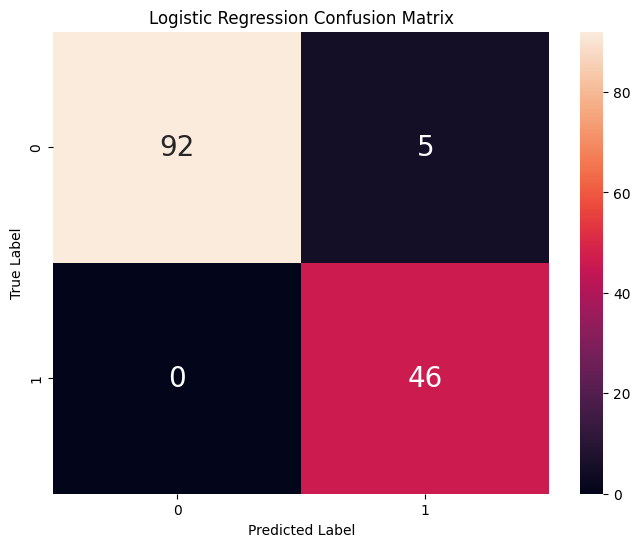

In [36]:
# Plot confusion matrix for Logistic Regression
cm = confusion_matrix(Y_test, logistic_regression_predictions)
print(cm)

# Create a heatmap with a title
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 20})  # 'g' format to avoid scientific notation
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

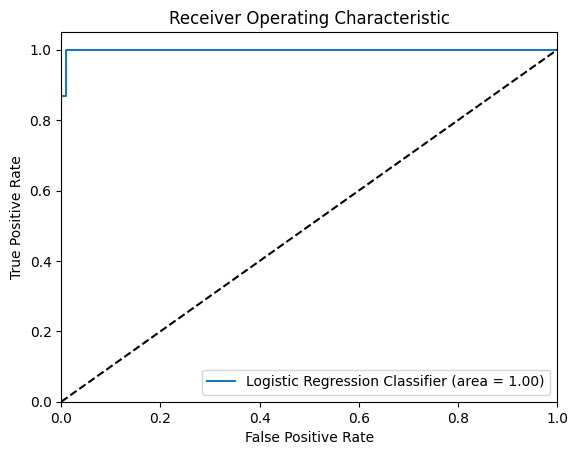

In [37]:
plt.figure()
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic Regression Classifier (area = %0.2f)' % logistic_regression_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Build a Decision Tree Classifier

In [38]:
# Create a Decision Tree Classifier object
decision_tree_classifier = DecisionTreeClassifier()

In [39]:
# Train the classifier using the training data
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
# Make predictions using the test data
decision_tree_predictions = decision_tree_classifier.predict(X_test)

In [41]:
# Print the actual and predicted values for comparison
print("Actual Values:", Y_test)
print("Predicted Values (Decision Tree):", decision_tree_predictions)

Actual Values: [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0]
Predicted Values (Decision Tree): [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0]


In [42]:
# Get the accuracy score for the Decision Tree Classifier
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)

In [43]:
# Sensitivity (Recall) for Decision Tree
decision_tree_sensitivity = recall_score(Y_test, decision_tree_predictions)

In [44]:
# Specificity calculation requires true negative and false positive counts
tn, fp, fn, tp = confusion_matrix(Y_test, decision_tree_predictions).ravel()
decision_tree_specificity = tn / (tn + fp)

In [45]:
# Precision for Decision Tree
decision_tree_precision = precision_score(Y_test, decision_tree_predictions)

In [46]:
# F1 Score for Decision Tree
decision_tree_f1_score = f1_score(Y_test, decision_tree_predictions)

In [47]:
# ROC Curve and AUC for Decision Tree
decision_tree_fpr, decision_tree_tpr, thresholds = roc_curve(Y_test, decision_tree_classifier.predict_proba(X_test)[:,1])
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

In [48]:
# Print the metrics
print("Decision Tree Classifier Metrics")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Sensitivity (Recall): {decision_tree_sensitivity:.2f}")
print(f"Specificity: {decision_tree_specificity:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"F1 Score: {decision_tree_f1_score:.2f}")
print(f"AUC: {decision_tree_auc:.2f}")

Decision Tree Classifier Metrics
Accuracy: 0.90
Sensitivity (Recall): 0.93
Specificity: 0.88
Precision: 0.78
F1 Score: 0.85
AUC: 0.91


[[85 12]
 [ 3 43]]


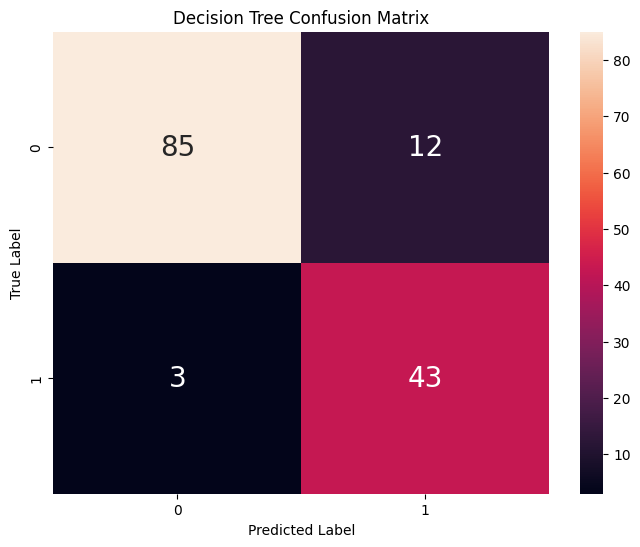

In [49]:
# Plot the confusion matrix for the Decision Tree Classifier
decision_tree_cm = confusion_matrix(Y_test, decision_tree_predictions)
print(decision_tree_cm)

# Create a heatmap with a title
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_cm, annot=True, fmt='g', annot_kws={"size": 20})  # 'g' format to avoid scientific notation
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

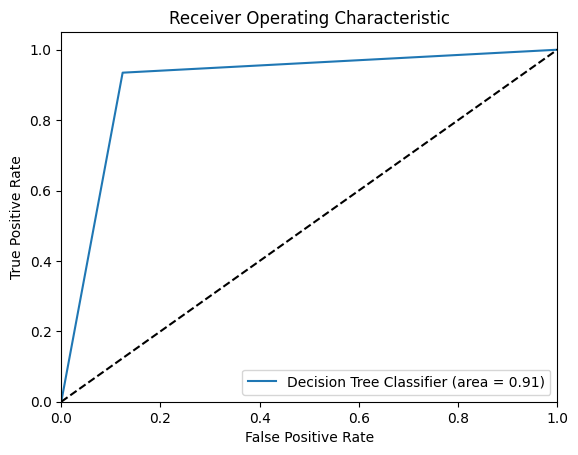

In [50]:
plt.figure()
plt.plot(decision_tree_fpr, decision_tree_tpr, label='Decision Tree Classifier (area = %0.2f)' % decision_tree_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Comparison

In [51]:
# Create a DataFrame to hold the accuracy scores
metrics_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [logistic_regression_accuracy, decision_tree_accuracy],
    'Sensitivity': [logistic_regression_sensitivity, decision_tree_sensitivity],
    'Specificity': [logistic_regression_specificity, decision_tree_specificity],
    'Precision': [logistic_regression_precision, decision_tree_precision],
    'F1 Score': [logistic_regression_f1_score, decision_tree_f1_score],
    'AUC': [logistic_regression_auc, decision_tree_auc]
})

In [52]:
# Display the comparison
print(metrics_comparison)

                 Model  Accuracy  Sensitivity  Specificity  Precision  \
0  Logistic Regression  0.965035     1.000000     0.948454   0.901961   
1        Decision Tree  0.895105     0.934783     0.876289   0.781818   

   F1 Score       AUC  
0  0.948454  0.998655  
1  0.851485  0.905536  


In [55]:
# Melt the DataFrame to have a suitable format for sns.barplot
metrics_melted = metrics_comparison.melt(id_vars='Model', var_name='Metric', value_name='Value')

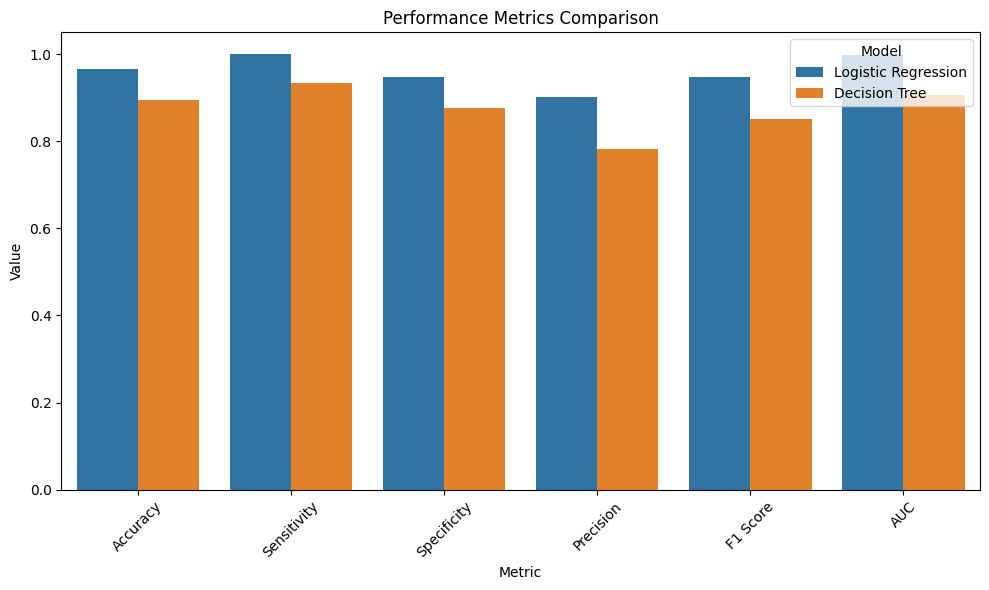

In [56]:
# Plot the metrics for visual comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Performance Metrics Comparison')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

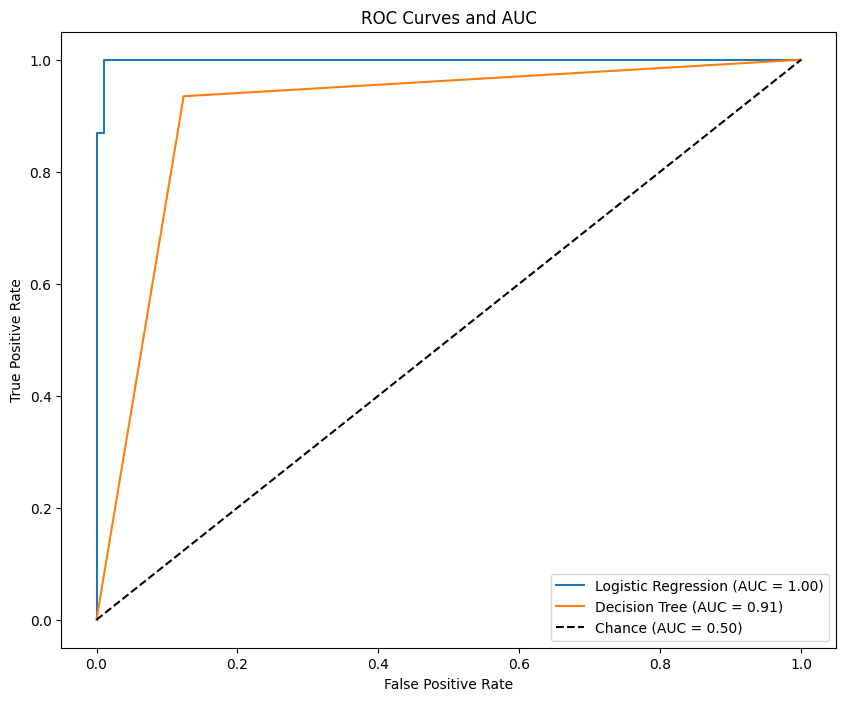

In [57]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

# Plot Logistic Regression ROC Curve
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label=f'Logistic Regression (AUC = {logistic_regression_auc:.2f})')

# Plot Decision Tree ROC Curve
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves and AUC')
plt.legend(loc='lower right')

# Show the plot
plt.show()